In [39]:
import pandas as pd

#### Import CSV

In [40]:
df = pd.read_csv('data/training.csv', index_col=0)

#### Get X & Y

In [41]:
X = df.drop(columns=['rider', 'team', 'key', 'target', 'year'])
X.fillna(0, inplace=True)
y = df.target

In [46]:
X.head()

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito,strength,finished
666,38,1486,14.0,0.0,0.0,0.0,2.952381,138.190476,2478.047619,66.0,36.0,0.916667
530,37,1459,0.0,0.0,0.0,0.0,3.142857,135.476190,2437.476190,66.0,28.0,0.909091
213,39,2364,83.0,0.0,0.0,54.0,2.952381,134.285714,2570.619048,0.0,53.0,0.818182
285,39,1765,10.0,0.0,0.0,0.0,2.952381,134.285714,2570.619048,0.0,33.0,0.818182
291,36,1603,0.0,0.0,38.0,0.0,2.952381,134.285714,2570.619048,66.0,32.0,0.818182


In [42]:
X_year = df.drop(columns=['rider', 'team', 'key', 'target']).fillna(0)
X_train = X_year[X_year['year']!=2021].drop(columns='year')
X_test = X_year[X_year['year']==2021].drop(columns='year')
y_year = df[['year', 'target']]
y_train = y_year[y_year['year']!=2021].drop(columns='year')
y_test = y_year[y_year['year']==2021].drop(columns='year')

#### Check na

In [43]:
corr = X.corr()
corr

,age,team_points,best-classic-riders,top-gc-riders,top-sprinters,top-time-trial-riders,profile_type,profile_score,profile_vert,scorito,strength,finished
age,1.000000,0.040574,0.072090,-0.034940,-0.079501,-0.002566,-0.040316,0.085066,0.011335,0.001007,0.006071,0.631276
team_points,0.040574,1.000000,0.151833,0.221839,0.057008,0.068614,0.340108,-0.462032,-0.147412,0.124635,-0.080637,0.055173
best-classic-riders,0.072090,0.151833,1.000000,0.198326,0.609911,-0.028056,0.036229,-0.059669,0.016565,0.182265,0.007661,0.078680
top-gc-riders,-0.034940,0.221839,0.198326,1.000000,-0.046630,0.290569,0.029261,-0.027056,0.035174,0.315724,-0.031648,0.042491
top-sprinters,-0.079501,0.057008,0.609911,-0.046630,1.000000,-0.074447,0.007433,-0.058360,-0.008576,0.156655,-0.006828,-0.079514
top-time-trial-riders,-0.002566,0.068614,-0.028056,0.290569,-0.074447,1.000000,-0.013543,0.003559,0.081886,0.210517,-0.005966,-0.061217
profile_type,-0.040316,0.340108,0.036229,0.029261,0.007433,-0.013543,1.000000,-0.744882,0.121583,-0.007050,0.228467,0.065113
profile_score,0.085066,-0.462032,-0.059669,-0.027056,-0.058360,0.003559,-0.744882,1.000000,-0.135332,-0.022542,0.142283,0.070343
profile_vert,0.011335,-0.147412,0.016565,0.035174,-0.008576,0.081886,0.121583,-0.135332,1.000000,-0.013778,0.265170,0.156984
scorito,0.001007,0.124635,0.182265,0.315724,0.156655,0.210517,-0.007050,-0.022542,-0.013778,1.000000,-0.047981,0.118541


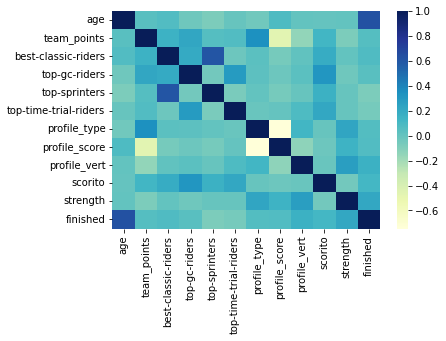

In [44]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu");

<AxesSubplot:>

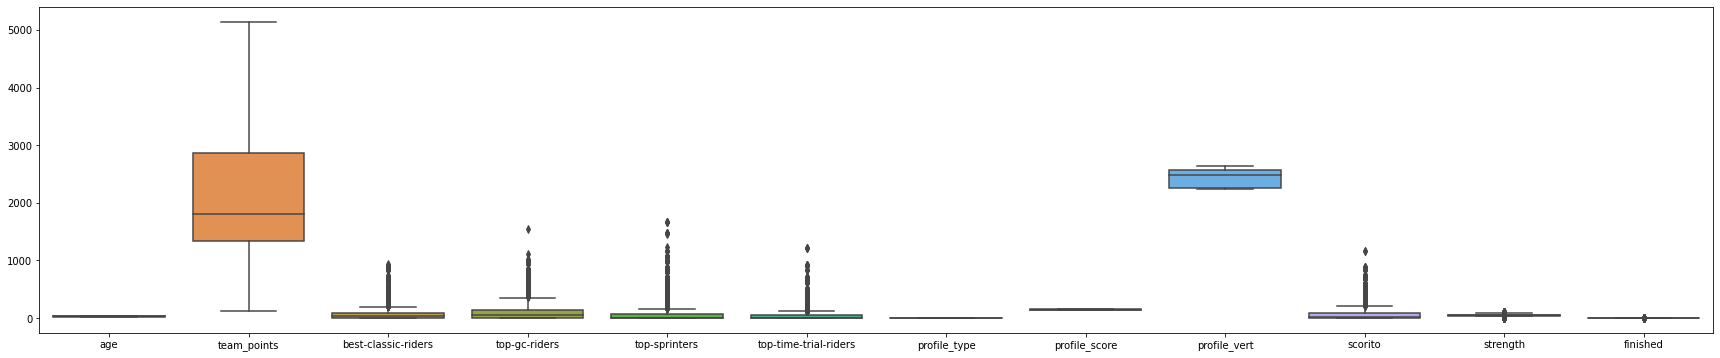

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(30,6))
sns.boxplot(data=X)

In [55]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)

In [56]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

model = Lasso()

cv_results = cross_validate(model, X_scaled, y, cv=5, scoring='r2')

In [57]:
cv_results['test_score'].mean()

0.19859546735949474

In [51]:
model.fit(X_train_scaled, y_train)

Lasso()

In [52]:
X_test_scaled = scaler.fit_transform(X_test)
model.score(X_test_scaled, y_test)

0.17283640235543807

In [53]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning(X,y):

    train_sizes = [25,50,75,100,250,500,750,1000,1150, 1500]

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=3)

    plt.figure(figsize=(20,6))
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='test scores')
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train scores')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

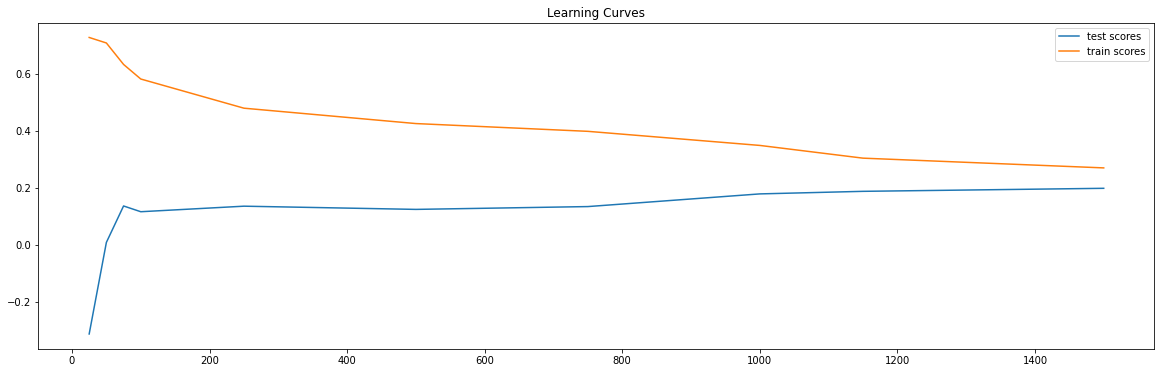

In [54]:
plot_learning(X_scaled,y)